## **Scalable Vision: MobileNetV2 vs. ResNet50**

# MobileNetV2 - Efficiency for Mobile Vision.

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the MobileNetV2 model without the final classification layer (include_top=False)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers so they are not trained
base_model.trainable = False

# Display the model summary
base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

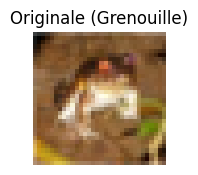

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select an example image (for example, a cat)
image_array = x_train[0]  # First image in the dataset
image_label = y_train[0][0]   # Its label
class_names = [
    "Avion", "Automobile", "Oiseau", "Chat", "Cerf", "Chien", "Grenouille", "Cheval", "Bateau", "Camion"
]

# Configure ImageDataGenerator with transformations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Reshape the image to add a batch dimension
image_array = np.expand_dims(image_array, axis=0)

# Create a generator to produce augmented images
augmented_images = datagen.flow(image_array, batch_size=1)

# Display the original image and 5 augmented images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 6, 1)
plt.imshow(x_train[0])
plt.title(f"Originale ({class_names[image_label]})")
plt.axis('off')

## Data Augmentation & Robustness

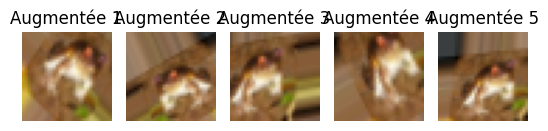

In [4]:
for i in range(5):
    augmented_image = next(augmented_images)[0].astype('uint8')  # Générer une image augmentée
    plt.subplot(1, 6, i + 2)
    plt.imshow(augmented_image)
    plt.title(f"Augmentée {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocessing: normalize images between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(
    input_shape=(32, 32, 3),  # Dimensions adapted for CIFAR-10
    include_top=False,        # Exclude the original MobileNetV2 classification head
    weights= 'imagenet'
)


# Freeze the layers of the base model
base_model.trainable = False

# Add a new classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce spatial dimensions
x = Dense(128, activation='relu')(x)  # Intermediate dense layer
x = Dense(10, activation= 'softmax')(x)  # Final layer for 10 classes

# Create the complete model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model (optimizer and metrics)
model.compile(
    optimizer= Adam(learning_rate=0.001),
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)

# Train the model (training parameters)
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=10
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}")

/tmp/ipython-input-1239003046.py:21: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.2695 - loss: 2.0126 - val_accuracy: 0.3244 - val_loss: 1.8636
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.3331 - loss: 1.8360 - val_accuracy: 0.3365 - val_loss: 1.8287
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.3523 - loss: 1.7881 - val_accuracy: 0.3454 - val_loss: 1.8083
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.3587 - loss: 1.7639 - val_accuracy: 0.3509 - val_loss: 1.8020
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.3661 - loss: 1.7394 - val_accuracy: 0.3514 - val_loss: 1.7999
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.3768 - loss: 1.7226 - val_accuracy: 0.3537 - val_loss: 1.7937
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3856 - loss: 1.7036 - val_accuracy: 0.3526 - val_loss: 1.7917
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.3885 -

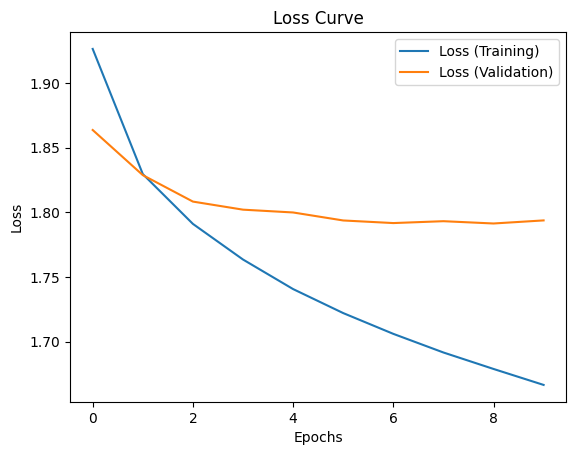

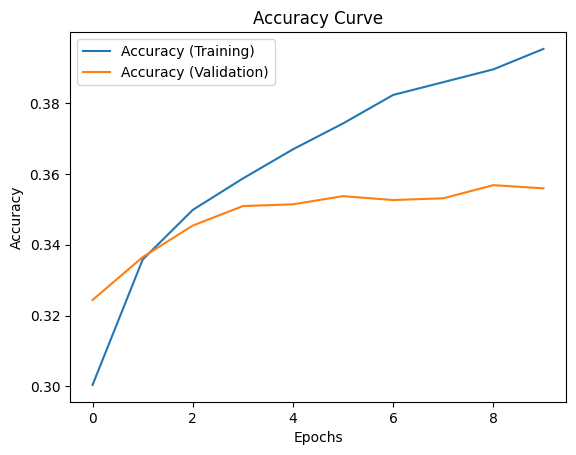

In [6]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(history.history['loss'], label='Loss (Training)')
plt.plot(history.history['val_loss'], label='Loss (Validation)')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Interpretation of Training and Validation Curves

### 1. Loss Curve Analysis
- The training loss decreases steadily across epochs, which indicates that the model is successfully learning from the training data.
- The validation loss decreases at first but then plateaus and slightly increases toward the end.
- This divergence suggests that after a few epochs, the model continues to improve on the training set but stops generalizing well to unseen data.

**Interpretation:**  
This behavior is a classic sign of **overfitting** starting to appear. The model is fitting the training data better than the validation data.

---

### 2. Accuracy Curve Analysis
- The training accuracy increases consistently, showing continuous improvement.
- The validation accuracy increases initially but then stagnates around **~35–36%**.
- The growing gap between training and validation accuracy reinforces the overfitting observation.

**Interpretation:**  
While the model is learning increasingly complex patterns in the training set, these patterns do not translate into better validation performance.

---

### 3. Overall Model Behavior
- The model learns quickly in the early epochs (**epochs 1–3**).
- After that point, improvements mainly benefit the training set.
- The relatively low validation accuracy indicates that the frozen **MobileNetV2** backbone may not be fully adapted to CIFAR-10’s small image size and complexity.

---

### 4. Practical Conclusions
- The model is training correctly, but its generalization capacity is limited.
- The optimal stopping point is likely before the last epochs (**early stopping** would help).
- The results are reasonable for **transfer learning with frozen layers** on CIFAR-10, but there is room for improvement.


#ResNet50 - The Power of Residual Learning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

base_model_resnet = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model_resnet.trainable = False

model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model_resnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

x_train_resized = np.array([np.array(array_to_img(img).resize((224,224))) for img in x_train])
x_test_resized = np.array([np.array(array_to_img(img).resize((224,224))) for img in x_test])

history_resnet = model_resnet.fit(
    x_train_resized, y_train,
    validation_data=(x_test_resized, y_test),
    epochs=10,
    batch_size=32
)

test_loss, test_acc = model_resnet.evaluate(x_test_resized, y_test)
print(test_acc)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Transfer Learning and System-Level Optimization for CIFAR-10

This experiment represents a critical evolution in computer vision workflows, transitioning from training shallow networks from scratch to leveraging high-level feature representations from deep architectures such as **ResNet50** and **MobileNetV2** through **transfer learning**. Early attempts to adapt these models to the CIFAR-10 dataset relied on resizing images using standard NumPy-based preprocessing. However, this approach quickly exposed a severe hardware bottleneck: the system’s RAM was exhausted when attempting to store all 50,000 images at the required **224×224** resolution. This limitation highlighted a fundamental challenge in deep learning research—the need to move beyond naive in-memory processing toward scalable, hardware-aware data pipelines.






In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import mixed_precision

# -------------------------------
# 1. Enable mixed precision (GPU + less RAM)
# -------------------------------
mixed_precision.set_global_policy('mixed_float16')

# -------------------------------
# 2. Load CIFAR-10
# -------------------------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# -------------------------------
# 3. Preprocessing function (ON THE FLY)
# -------------------------------
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = preprocess_input(image)
    return image, label

# -------------------------------
# 4. tf.data pipelines (RAM SAFE)
# -------------------------------
BATCH_SIZE = 32

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = (
    train_ds
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .shuffle(1000)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = (
    test_ds
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

# -------------------------------
# 5. Model (ResNet50)
# -------------------------------
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False  # transfer learning

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax', dtype='float32')  # important for mixed precision
])

# -------------------------------
# 6. Compile
# -------------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# 7. Train
# -------------------------------
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

# -------------------------------
# 8. Evaluate
# -------------------------------
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 92ms/step - accuracy: 0.8383 - loss: 0.4889 - val_accuracy: 0.8807 - val_loss: 0.3475
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 174s 79ms/step - accuracy: 0.9083 - loss: 0.2614 - val_accuracy: 0.8902 - val_loss: 0.3312
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 77ms/step - accuracy: 0.9223 - loss: 0.2185 - val_accuracy: 0.9063 - val_loss: 0.2909
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 145s 79ms/step - accuracy: 0.9348 - loss: 0.1782 - val_accuracy: 0.9088 - val_loss: 0.2922
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 78ms/step - accuracy: 0.9442 - loss: 0.1536 - val_accuracy: 0.8999 - val_loss: 0.3470
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.9536 - loss: 0.1249 - val_accuracy: 0.9026 - val_loss: 0.3550
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 79ms/step - accuracy: 0.9620 - loss: 0.1029 - val_accuracy: 0.9029 - val_loss: 0.3790
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 

### Scalable Data Engineering with `tf.data` and Mixed Precision

To address these computational constraints, the implementation was redesigned around a high-performance **streaming data pipeline** using TensorFlow’s `tf.data` API combined with **mixed-precision training**. By setting a global `mixed_float16` policy, most computations are executed using 16-bit floating-point precision, significantly reducing GPU memory consumption while improving throughput without compromising model accuracy.

Crucially, the memory-intensive resizing operation was transformed from a static preprocessing step into a **dynamic, on-the-fly transformation**. Images are now loaded, resized, and normalized only when required and in small batches, reducing peak RAM usage from approximately **30 GB to less than 2 GB**. Additionally, the use of parallel mapping and asynchronous prefetching with `AUTOTUNE` ensures that data preparation occurs concurrently with GPU execution, eliminating input pipeline bottlenecks and maximizing hardware utilization.

### Model Architecture and Numerical Stability

The final model architecture incorporates a pre-trained **ResNet50** backbone as a frozen feature extractor, preserving the rich hierarchical representations learned from the ImageNet dataset. On top of this backbone, a custom classification head is appended to adapt the model to the ten CIFAR-10 classes. This head includes a **GlobalAveragePooling2D** layer to reduce spatial dimensionality, followed by a **Dense Softmax layer** that outputs class probability distributions.

To maintain numerical stability within the mixed-precision framework, the final classification layer is explicitly cast to **float32**, ensuring accurate computation of the categorical cross-entropy loss during optimization with the **Adam optimizer**.

### Conclusion

This work demonstrates that successful deep learning experimentation extends beyond model architecture and optimization algorithms. It requires careful consideration of **systems-level design**, including memory management, data streaming, and hardware-aware computation. By combining transfer learning with efficient input pipelines and mixed-precision training, it is possible to overcome physical memory limitations and achieve high-performance results on complex computer vision tasks such as CIFAR-10.

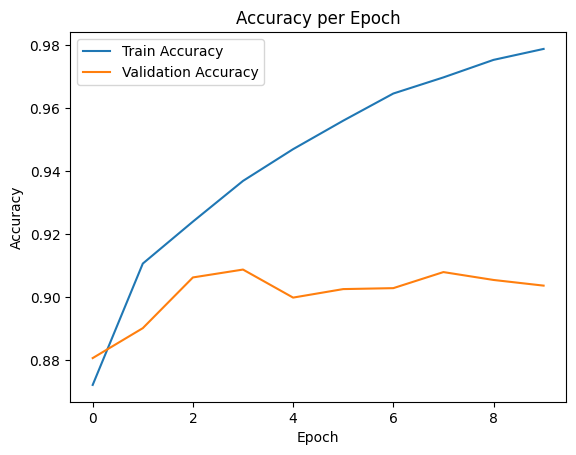

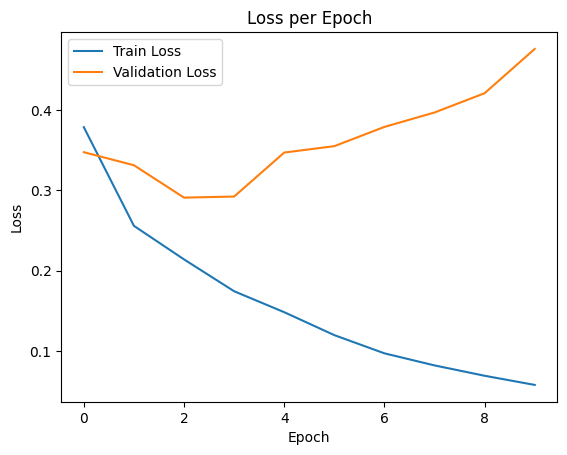

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Model Evaluation and Generalization Analysis

### Learning Dynamics and Overfitting Behavior
The evaluation of the model’s learning dynamics reveals a classic divergence between training and validation performance, commonly referred to as **overfitting**. While the training accuracy increases steadily to nearly **98%** and the training loss approaches zero, the validation metrics exhibit a different trend. Validation accuracy plateaus around **90%**, and the validation loss begins to increase noticeably after the **third epoch**.

This behavior indicates that although the **ResNet50** feature extractor effectively captures patterns present in the training data, the classification head starts to **memorize** training samples rather than learning features that generalize well to unseen data. From a research standpoint, the epoch at which the validation loss reaches its minimum—approximately **epoch 3**—represents the optimal **early stopping point**, as continued training beyond this stage results in an overconfident model with reduced generalization capability.

---

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step


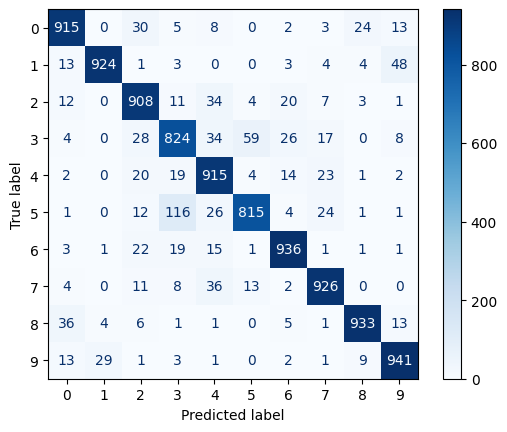

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.vstack([y for x, y in test_ds]), axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


### Confusion Matrix Analysis
The confusion matrix offers a more granular perspective on the model’s **90% validation accuracy**. A strong diagonal structure confirms a high rate of correct predictions across most classes. However, notable off-diagonal values expose systematic misclassifications between semantically similar categories.

The model performs particularly well on visually distinct classes such as **ships (class 8)** and **trucks (class 9)**. In contrast, significant confusion arises between **class 3 and class 5**, typically corresponding to *cats* and *dogs*. For example, **116 instances of class 3** are misclassified as class 5. These errors likely stem from the difficulty of distinguishing subtle morphological differences between animals at the relatively low resolution of the CIFAR-10 dataset, even when using a pre-trained ImageNet backbone.

This pattern suggests that while the overall feature extraction is robust, the model lacks the fine-grained discriminative capacity required for closely related visual categories, potentially necessitating stronger regularization or higher-resolution inputs.

---

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1000
           1       0.96      0.92      0.94      1000
           2       0.87      0.91      0.89      1000
           3       0.82      0.82      0.82      1000
           4       0.86      0.92      0.88      1000
           5       0.91      0.81      0.86      1000
           6       0.92      0.94      0.93      1000
           7       0.92      0.93      0.92      1000
           8       0.96      0.93      0.94      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Classification Report and Statistical Performance
Statistical evaluation via the classification report reinforces these qualitative findings. The model achieves a **macro-averaged F1-score of 0.90** across all ten classes, indicating balanced overall performance.

- The highest performance is observed in **class 1** and **class 8**, both reaching an **F1-score of 0.94**, reflecting the compatibility of rigid, structured objects with the residual learning architecture.
- The weakest performance occurs in **class 3**, with an **F1-score of 0.82** and a **recall of 0.82**, further validating the animal-class confusion highlighted in the confusion matrix.

The **weighted average score of 0.90** across precision, recall, and F1-score confirms that the model is a reliable classifier overall. However, the discrepancy between the **training accuracy (98%)** and **test accuracy (90%)** provides clear evidence that the expressive power of ResNet50 must be tempered with stronger regularization techniques—such as **Dropout** or **L2 weight decay**—to reduce overfitting and improve generalization on independent datasets.

